# Data Preparation and Analysis

## Part 1: Data Preperations

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

### 1.1 Data Loading
Lets now load in the data from the saved .csv files and store each years data in a seperate dataframe.

In [2]:
# File path to 2021 sales data csv
file_path_2021 = "data/2021_property_sales_data.csv"
# Load the 2021 sales data into its own dataframe
df_2021 = pd.read_csv(file_path_2021)
df_2021 = df_2021.drop(columns = "Unnamed: 0")

In [3]:
# File path to 2022 sales data csv
file_path_2022 = "data/2022_property_sales_data.csv"
# Load the 2022 sales data into its own dataframe
df_2022 = pd.read_csv(file_path_2022)
df_2022 = df_2022.drop(columns = "Unnamed: 0")

In [4]:
# File path to 2023 sales data csv
file_path_2023 = "data/2023_property_sales_data.csv"
# Load the 2023 sales data into its own dataframe
df_2023 = pd.read_csv(file_path_2023)
df_2023 = df_2023.drop(columns = "Unnamed: 0")

In [5]:
# File path to 2024 sales data csv
file_path_2024 = "data/2024_property_sales_data.csv"
# Load the 2024 sales data into its own dataframe
df_2024 = pd.read_csv(file_path_2024)
df_2024 = df_2024.drop(columns = "Unnamed: 0")

### 1.2 Data Format
Lets now check if the values are of the same format by using frequency tables.

#### Sale Date
Lets convert the string formats dates -> datetime objects of the following format yyyy-mm-dd.

E.g,. 15 January 2021 -> 2021-01-15

In [6]:
## Helper function to parse date of format "15 January 2021" into 2021-01-15
def convert_date(date_str):
    try:
        # Date already in yyyy-mm-dd format.
        return datetime.strptime(date_str, "%Y-%m-%d")
    except ValueError:
        pass
    try:
        return datetime.strptime(date_str, "%d %B %Y")
    except ValueError:
        return None

Lets clean the date values to be of the format "yyyy-mm-dd"

In [7]:
# Stripping "sold" from the beggining of each entry in the "Sale Date" column.
df_2021["Sale Date"] = df_2021["Sale Date"].str.strip().str.replace("Sold", "",regex=False).str.strip()
df_2022["Sale Date"] = df_2022["Sale Date"].str.strip().str.replace("Sold", "",regex=False).str.strip()
df_2023["Sale Date"] = df_2023["Sale Date"].str.strip().str.replace("Sold", "",regex=False).str.strip()
df_2024["Sale Date"] = df_2024["Sale Date"].str.strip().str.replace("Sold", "",regex=False).str.strip()
print("All values have been stripped of the prefix sold")

All values have been stripped of the prefix sold


Something here...

In [8]:
df_2021["Sale Date"] = pd.to_datetime(df_2021["Sale Date"].apply(convert_date))
df_2022["Sale Date"] = pd.to_datetime(df_2022["Sale Date"].apply(convert_date))
df_2023["Sale Date"] = pd.to_datetime(df_2023["Sale Date"].apply(convert_date))
df_2024["Sale Date"] = pd.to_datetime(df_2024["Sale Date"].apply(convert_date))
print("All values have now been converted to the format yyyy-mm-dd ")

All values have now been converted to the format yyyy-mm-dd 


#### Sale Price
This data is formatted in the following formats:
 - €709,606.00
 - € 553,235

Lets process this data so if the input was "€500,000.00" the output would be 500000.0

In [9]:
# Helper function to remove currenct sign and format the values as a 
# string with format double rounded to 2 decimal places.

def clean_sale_prices(value):
    # Remove the currency sign
    value = str(value).replace("€", "").replace(",", "").strip()

    try:
        # Try to convert the string to a float and round to 2 decimal places
        return round(float(value), 2)
    except ValueError:
        return None

Apply the helper function to all entries in the column.

In [10]:

df_2021["Sale Price"] = df_2021["Sale Price"].apply(clean_sale_prices)
df_2022["Sale Price"] = df_2022["Sale Price"].apply(clean_sale_prices)
df_2023["Sale Price"] = df_2023["Sale Price"].apply(clean_sale_prices)
df_2024["Sale Price"] = df_2024["Sale Price"].apply(clean_sale_prices)

Lets double check the output of our new column.

#### Location
All entries are of a valid string format, thus no pre-processing steps need to be applied to these columns.

#### Year Built
This data is currently stored in the following formats:
 - Unknown
 - c1999 (Where there is a prefixed char)
 - 1999c (Where there is a suffix char)

Lets process these entries for each dataframe so each entry is a valid year.

Properties with unknown years will be filled in with the median year amoung all other entries.

In [11]:
# Extract the first 4 digits from anywhere in the string, and add back into the column.
df_2021["Year Built"] = df_2021["Year Built"].str.extract(r"(\d{4})")
df_2022["Year Built"] = df_2022["Year Built"].str.extract(r"(\d{4})")
df_2023["Year Built"] = df_2023["Year Built"].str.extract(r"(\d{4})")
df_2024["Year Built"] = df_2024["Year Built"].str.extract(r"(\d{4})")

In [12]:
# Convert the extracted year values to numeric (integers)
df_2021["Year Built"] = pd.to_numeric(df_2021["Year Built"], errors="coerce")
df_2022["Year Built"] = pd.to_numeric(df_2022["Year Built"], errors="coerce")
df_2023["Year Built"] = pd.to_numeric(df_2023["Year Built"], errors="coerce")
df_2024["Year Built"] = pd.to_numeric(df_2024["Year Built"], errors="coerce")

In [13]:
# Fill in empty values with the median value for each year.
median_2021 = round(df_2021["Year Built"].median())
df_2021["Year Built"] = df_2021["Year Built"].fillna(median_2021).astype(int)

median_2022 = round(df_2022["Year Built"].median())
df_2022["Year Built"] = df_2022["Year Built"].fillna(median_2022).astype(int)

median_2023 = round(df_2023["Year Built"].median())
df_2023["Year Built"] = df_2023["Year Built"].fillna(median_2023).astype(int)

median_2024 = round(df_2024["Year Built"].median())
df_2024["Year Built"] = df_2024["Year Built"].fillna(median_2024).astype(int)

In [14]:
df_2021["Year Built"] = df_2021["Year Built"].astype("Int64")
df_2022["Year Built"] = df_2022["Year Built"].astype("Int64")
df_2023["Year Built"] = df_2023["Year Built"].astype("Int64")
df_2024["Year Built"] = df_2024["Year Built"].astype("Int64")

#### Garden
Entries in the Garden column are of the following formats:
 - Yes
 - No
 - ???
   
Lets perform some processing to map the "???" entries to "Unknown"

In [15]:
# Dictionary to map "???" entry to "Unknown"
map1 = {"???":"Unknown"}

In [16]:
# For each entry in the "Garden" column in the 4 dataframes "???" entries are replaced with "Unknown"
df_2021["Garden"] = df_2021["Garden"].replace(map1)
df_2022["Garden"] = df_2022["Garden"].replace(map1)
df_2023["Garden"] = df_2023["Garden"].replace(map1)
df_2024["Garden"] = df_2024["Garden"].replace(map1)

#### Garage
Entries in the Garage column are of the following formats:
 - Yes
 - No
 - ???
   
Lets perform some processing to map the "???" entries to "Unknown"

In [17]:
# Since the entries are of the same  values as the "Garden" column we can use the same maping dictionary as
# before for the four dataframes.
df_2021["Garage"] = df_2021["Garage"].replace(map1)
df_2022["Garage"] = df_2022["Garage"].replace(map1)
df_2023["Garage"] = df_2023["Garage"].replace(map1)
df_2024["Garage"] = df_2024["Garage"].replace(map1)

#### Type
Entries in the Type column are of the following formats:
 - Detached
 - Bungalow
 - Semi-Detached
 - Duplex
 - End-of-Terrace
 - Terraced
 - Semi-D
 - Det.
   
As you can see "Semi-Detached" and "Semi-D" should be counted together. The Same logic is applied to "Detached" and "Det.". 

Lets now use a mapping dictionary to use a universal entry format for Semi-Detached and Detached houses.

In [18]:
# Define a mapping dictionary to universally format entries for detached and semi-detached houses.
house_type_map = {"Det.":"Detached", "Semi-D":"Semi-Detached"}

In [19]:
# Strip and whitespace from the entries across the 4 dataframes.
df_2021["Type"] = df_2021["Type"].str.strip()
df_2022["Type"] = df_2022["Type"].str.strip()
df_2023["Type"] = df_2023["Type"].str.strip()
df_2024["Type"] = df_2024["Type"].str.strip()

In [20]:
# Apply the mapping dictionary to universally format the incorrect entries.
df_2021["Type"] = df_2021["Type"].replace(house_type_map)
df_2022["Type"] = df_2022["Type"].replace(house_type_map)
df_2023["Type"] = df_2023["Type"].replace(house_type_map)
df_2024["Type"] = df_2024["Type"].replace(house_type_map)

#### Stories
Entries in the Type column are of the following formats:
 - 1 Storey
 - 1.5 Storey
 - 2 Storey

Lets remove the text and convert to a numeric value.

In [21]:
# Remove the -Storey prefix
df_2021["Stories"] = df_2021["Stories"].str.replace("-Storey", "").str.strip()
df_2022["Stories"] = df_2022["Stories"].str.replace("-Storey", "").str.strip()
df_2023["Stories"] = df_2023["Stories"].str.replace("-Storey", "").str.strip()
df_2024["Stories"] = df_2024["Stories"].str.replace("-Storey", "").str.strip()

In [22]:
# Convert all entries to a numeric value.
df_2021["Stories"] = pd.to_numeric(df_2021["Stories"],errors="coerce")
df_2022["Stories"] = pd.to_numeric(df_2022["Stories"],errors="coerce")
df_2023["Stories"] = pd.to_numeric(df_2023["Stories"],errors="coerce")
df_2024["Stories"] = pd.to_numeric(df_2024["Stories"],errors="coerce")

#### Bedrooms

Entries in this columns are strings.

Lets convert them to numeric values.

In [23]:
df_2021["Bedrooms"] = pd.to_numeric(df_2021["Bedrooms"],errors="coerce")
df_2022["Bedrooms"] = pd.to_numeric(df_2022["Bedrooms"],errors="coerce")
df_2023["Bedrooms"] = pd.to_numeric(df_2023["Bedrooms"],errors="coerce")
df_2024["Bedrooms"] = pd.to_numeric(df_2024["Bedrooms"],errors="coerce")

#### Bathrooms

Entries in this columns are strings.

Lets convert them to numeric values.

In [24]:
df_2021["Bathrooms"] = pd.to_numeric(df_2021["Bathrooms"],errors="coerce")
df_2022["Bathrooms"] = pd.to_numeric(df_2022["Bathrooms"],errors="coerce")
df_2023["Bathrooms"] = pd.to_numeric(df_2023["Bathrooms"],errors="coerce")
df_2024["Bathrooms"] = pd.to_numeric(df_2024["Bathrooms"],errors="coerce")

#### First Time Buyer
Entries in the First Time Buyer columns are of the following formats:
 - Yes
 - No
 - NO
 - YES

Lets now convert all entries to lowercase to create a universal entry format.

In [25]:
# Use the .str.lower() function to convert all characters to lowercase
# Then use the str.strip() function to remove all prefix and suffix whitespace.
df_2021["First Time Buyer"] = df_2021["First Time Buyer"].str.lower().str.strip()
df_2022["First Time Buyer"] = df_2022["First Time Buyer"].str.lower().str.strip()
df_2023["First Time Buyer"] = df_2023["First Time Buyer"].str.lower().str.strip()
df_2024["First Time Buyer"] = df_2024["First Time Buyer"].str.lower().str.strip()

## Part 2: Property Sales - Multi Year Analysis (2021-2024)

Lets now use the 4 cleaned ABTs containing property sales data from 2021-2024.

This allows us to observe:
- cross-sectional differences (location, type, features)
- temporal changes in the housing market over time

In [26]:
# Import data vis librarys
import matplotlib
import matplotlib.pyplot as plt

### 1) Combine ABTs
Lets make a master dataframe composed of the sales data over the four years.

Lets also add a "Year" column for ease of access. The "Year" column will store the year the property was sold.

In [27]:
master_df = pd.concat([df_2021, df_2022, df_2023, df_2024], ignore_index=True)
master_df["Year"] = master_df["Sale Date"].dt.year

### 2) Dataset Overview 

In [28]:
master_df.info()
#master_df.describe(numeric_only=True)
master_df["Year"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Sale Date         1450 non-null   datetime64[ns]
 1   Sale Price        1450 non-null   float64       
 2   Location          1450 non-null   object        
 3   Year Built        1450 non-null   Int64         
 4   Garden            1450 non-null   object        
 5   Garage            1450 non-null   object        
 6   Type              1450 non-null   object        
 7   Stories           1450 non-null   float64       
 8   Bedrooms          1450 non-null   int64         
 9   Bathrooms         1450 non-null   int64         
 10  First Time Buyer  1450 non-null   object        
 11  Year              1450 non-null   int32         
dtypes: Int64(1), datetime64[ns](1), float64(2), int32(1), int64(2), object(5)
memory usage: 131.8+ KB


Year
2024    459
2023    355
2021    323
2022    313
Name: count, dtype: int64

###  3) Sale Price Trends Across Years

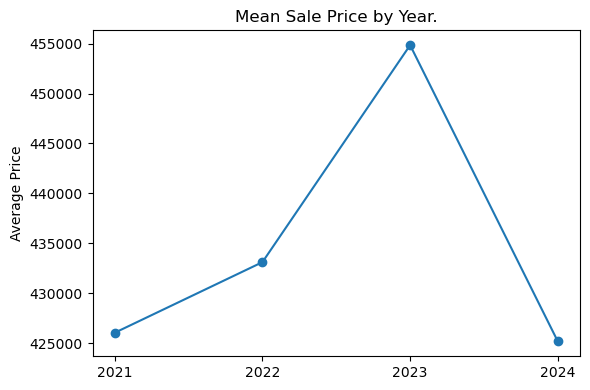

In [72]:
yearly_average = master_df.groupby("Year")["Sale Price"].mean()
plt.figure(figsize=(6,4))
plt.plot(yearly_average.index.astype(str), yearly_average.values, marker="o")
plt.xticks(rotation=0)
plt.title("Mean Sale Price by Year.")
plt.ylabel("Average Price")
plt.tight_layout()
plt.show()

#### Observation

These results tell us that the mean Sale Price of the properties in the dataset fluctuate between just above "€425,000" and just below "€455,000", with 2024 having the lowest mean Sale Price and 2023 having the largest.

### 4) Location Trends Over Time

<Figure size 1500x1000 with 0 Axes>

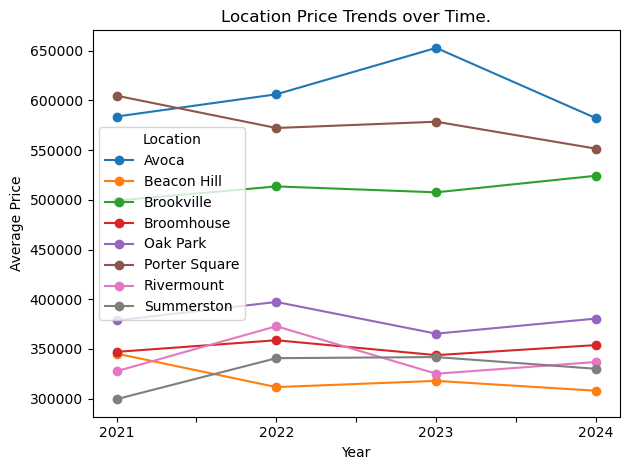

In [78]:
plt.figure(figsize=(15,10))

# Group and shape
location_price_over_time = master_df.groupby(["Year", "Location"])["Sale Price"].mean().unstack()

# Convert the numeric year values to string to add as the x-axis labels
location_price_over_time.index = location_price_over_time.index.astype(str)

# Plot the graph
location_price_over_time.plot(marker="o")
plt.title("Location Price Trends over Time.")
plt.ylabel("Average Price")
plt.tight_layout()
plt.show()

####  Observation

No Locations are suffering from a noticable drop in market value over time, however Avoca experienced an increase in mean Sale Price from just below €600,000 in 2021 to almost €650,000 just two years later in 2023.

Furthermore, a clear seperation in market values between locations are visable here with:
 - Avoca and Porter Square typically falling in the €575,000 to €650,000 price range. 
 - Brookville falling in the €500,000 age range.
 - Summerston, Rivermount, Beacon Hill, Broomhouse, and Oak Park falling in the €300,000 to €375,000 range. 

### Mean Sale price per Location over the four years.

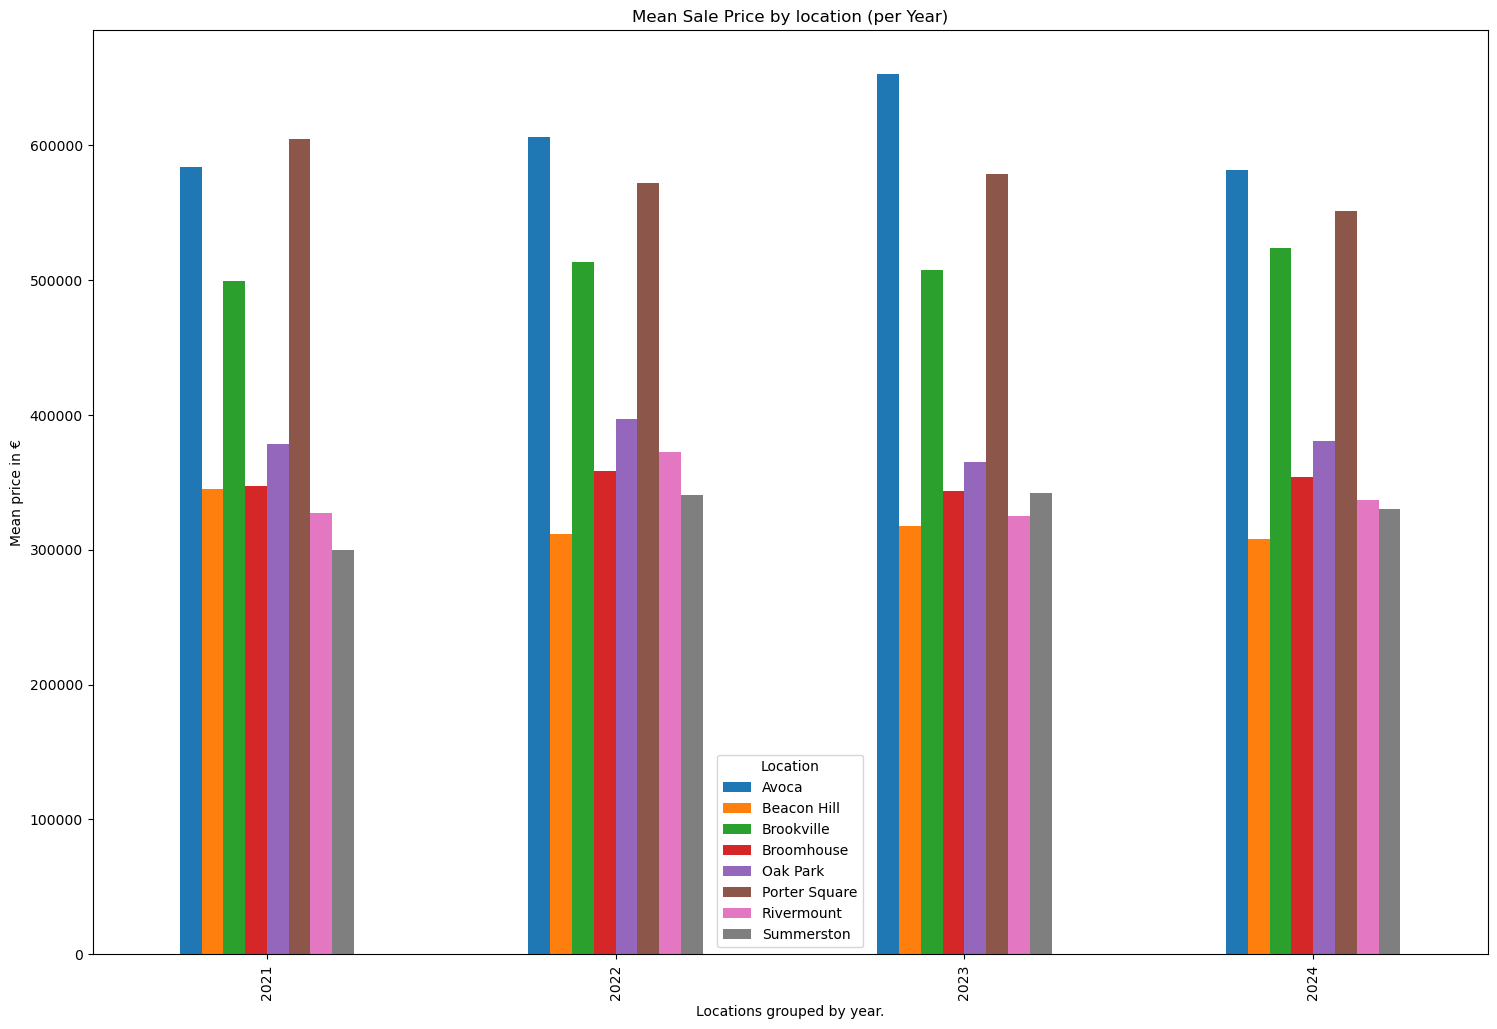

In [48]:
master_df.groupby(["Year", "Location"])["Sale Price"].mean().unstack().plot(kind="bar", figsize=(18,12))
plt.ylabel("Mean price in €")
plt.xlabel("Locations grouped by year.")
plt.title(f"Mean Sale Price by location (per Year)")
plt.show()

### Observation 

This chart showing the Mean Sale Price per location reinforces the observations made previously.

### Property Type Market shift

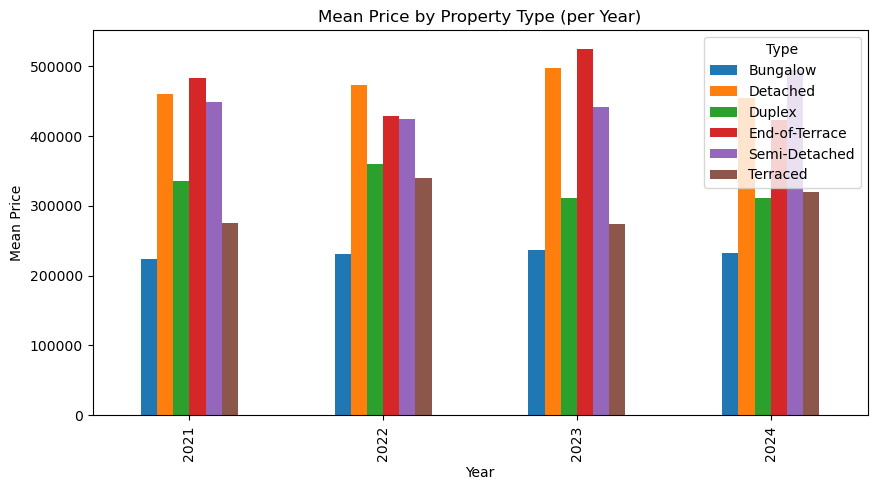

In [81]:
master_df.groupby(["Year", "Type"])["Sale Price"].mean().unstack().plot(kind="bar", figsize=(10,5))
plt.title("Mean Price by Property Type (per Year)")
plt.ylabel("Mean Price")
plt.show()

#### Observation

This graph shows the average price per property type, grouped by year.

Trends stay constant throughout the years with the following characteristics:
 - Bungalows being the cheapest property type and costing roughly €225,000
 - Terraced houses are the second cheapest property types with the exception of 2024 where they are slightly more expensive than duplex properties. Terraced houses range from €250,000 to €325,000.
 - Duplex properties are the third cheapest property types (with the exception of 2024 as mentioned above), and range from €275,000 to €350,000
 - Semi-Detached properties are the 4th cheapest with the exception of 2024 where they are actually the most expensive (Maybe look into this they all might be in a more expensive location or something) and typically range from 425,000 to 450,000. 
 - Detached and End-Of_Terrace fluctuate between most and second most expensive property type, with 2024 being an exception. These two property types have a price range of €425,000 and €500,000

### Semi-detached Price outlier in 2024

Semi-Detached properties were the most expensive of the property types in 2024. This seems slightly unusual since the previous 3 years placed them as the 3rd most expensive of the property types in the dataset. 

Lets now explore this outlier result to try and understand what might be causing it.

My first intuition into why this might be the case is that the location of the semi-detached houses sold in 2024 are in the more expensive areas. Lets now see if this is the case.

Text(0.5, 1.0, 'Number of property types sold per location, type and year')

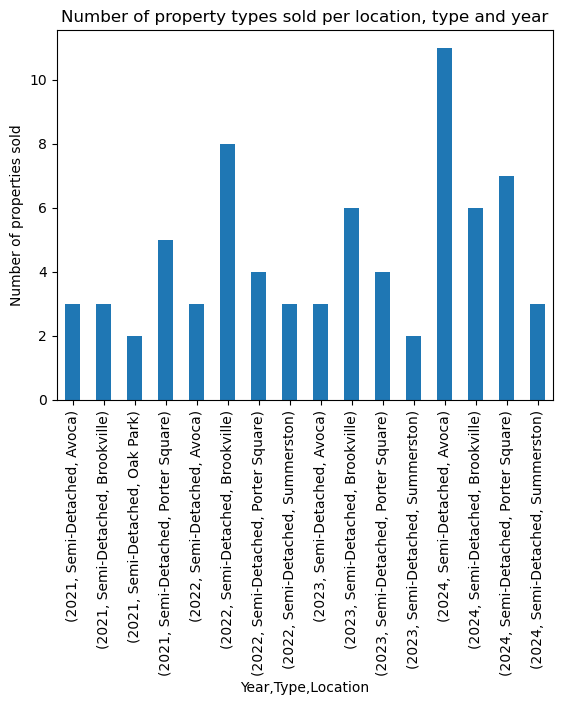

In [112]:
expensive_area_set = {"Avoca","BrookVille","Porter Square"}
semi_detached_properties_in_expensive_areas = master_df[(master_df["Type"] == "Semi-Detached") & (master_df["Location"].isin(expensive_area_set))]
property_type_per_location = semi_detached_properties.groupby(["Year","Type","Location"]).size()
property_type_per_location.plot(kind="bar")
plt.ylabel("Number of properties sold")
plt.title("Number of property types sold per location, type and year")

### Observation

From the Graph the following: x-axis = (2021, Semi-Detached, Avoca), y-axis = 3, reads as "3 Semi-Detached properties were sold in the Avoca area in 2021."

This will give us an insight into if location was a cause of the outlier price for semi-detached properties in 2024.

The results of this graph are as follows:
 - 

### Number of Sales Per Month

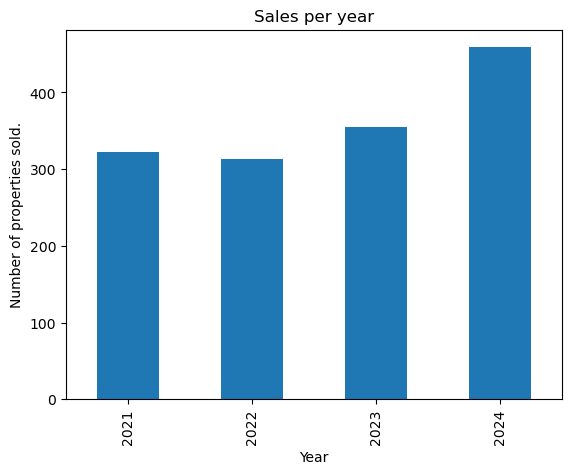

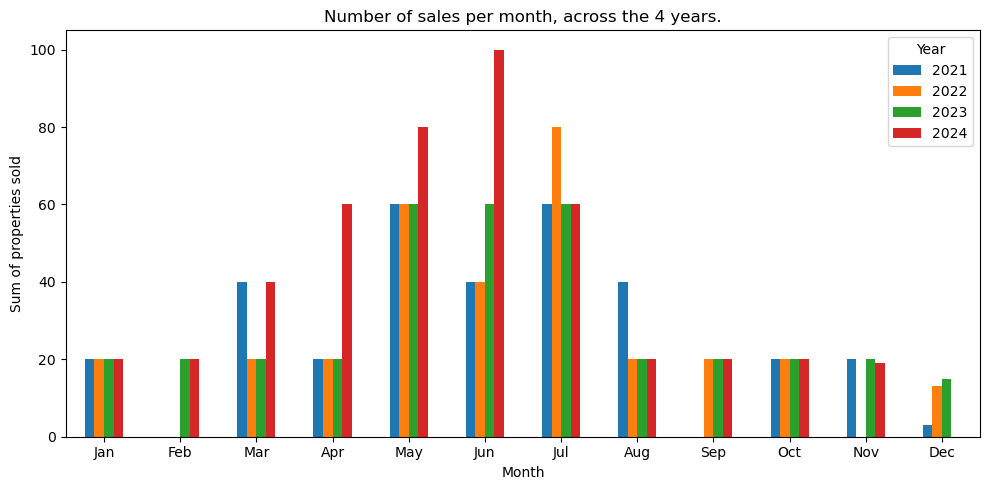

In [89]:
sales_per_year = master_df.groupby("Year").size()
sales_per_year.plot(kind="bar")
plt.title("Sales per year")
plt.ylabel("Number of properties sold.")
plt.show()


months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
master_df["Month"] = master_df["Sale Date"].dt.month

Sales_perMonth = master_df.groupby(["Month", "Year"]).size().unstack()
Sales_perMonth.plot(kind="bar", figsize=(10,5))
plt.xticks(ticks=range(12), labels=months, rotation=0)
plt.title("Number of sales per month, across the 4 years.")
plt.ylabel("Sum of properties sold")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

#### Observation

There is a clear trend here, property sales remain quite for the non summer months with a huge spike in the number of sales in May, June, and July.

2024 saw a large rise (+100) in the number of sales compared to the three previous years.

### Key Results
- Sale prices have [↑ increased / ↓ decreased] overall from 2021–2024
- Best-performing locations: [X, Y]
- Most valuable structural drivers: Bedrooms, Bathrooms, Year Built
- Amenities (Garden, Garage) consistently add value to homes
- Some trends strengthen over time → possible market evolution

### Limitations
- Limited geographic scope
- No information on interior condition / energy rating / lot size
- Some sample sizes small when split by year + category

### Future Work
- Predictive modelling (price estimation)
- Hedonic pricing model including interaction terms


## Part 3: Discussion